---
layout: default
title: "Deep Learning - Softmax classifier"
categories: deeplearning
permalink: /ML32/
order: 32
comments: true
---

In [43]:
%pylab --no-import-all inline
from plot_ann import ann
plt.rcParams["mathtext.fontset"] = "cm"
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


# Softmax regression
Softmax regression allow multi-class classification. A multi-class classifier is able to discriminate among $C$ different classes. So our neural network will have $C$ hidden units in its output layer $n^{[L]}=C$. For example in <a href="#fig:multiclassnn">the figure below</a> we have a 4 class classifier.

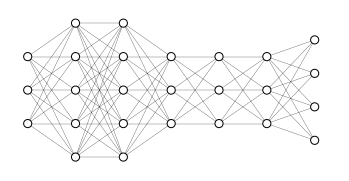

In [3]:
ax, *_ = ann([3, 5, 5, 3, 3, 3, 4], width=2)
ax.set_aspect('equal')

<i id="fig:multiclassnn"></i>

In general, we expect that each of the output unit will give the probability that an input belong to each class. For the neural network in <a href="#fig:multiclassnn">the figure above</a>:

$$
\begin{aligned}
& P(0 | x)\\
& P(1 | x)\\
& P(2 | x)\\
& P(3 | x)\\
\end{aligned}
$$

and the output is 

$$
\hat{y} \in \mathbb{R}^{4 \times 1} \qquad \to \qquad \sum_{j=1}^{C} \hat{y}_j = 1
$$

In order to achieve that **softmax regression** is used in layer $L$ where the **softmax activation function** is applied to $z^{[L]}$

$$
\begin{aligned}
& z^{[L]} = w^{[L]} a^{[L-1]} + b^{[L]} \\
& a^{[L]} = \frac{t}{\sum_{j=1}^C t_j} \in \mathbb{R}^{C\times 1}
\end{aligned}
$$

where $t=e^{\left(z^{[L]}\right)}$. Differently from other activation functions, the softmax activation takes as input a $(C, 1)$ vector and outputs a $(C, 1)$ vector instead of a single value as the activation functions that we have seen until now.

### Softmax regression generalizes logistic regression
Suppose we have a very simple neural network as in panel A of <a href="#fig:softmaxboundary">the figure below</a>. This network is a pure **softmax regression**, in other words a generalization of logistic regression for many classes. We can see in panel B of <a href="#fig:softmaxboundary">the figure below</a> how the learned decision boundaries (calculated by assigning each pixel in the feature space to one of the tree classes) are linear. Linearity is due to the low complexity of the neural network that has no hidden layers.

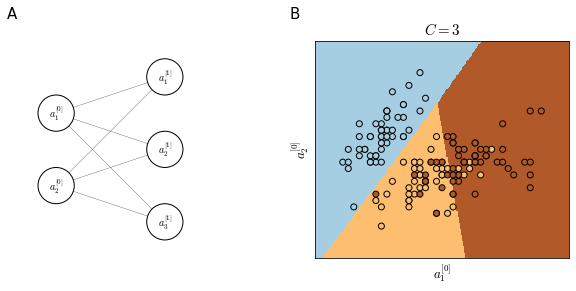

In [60]:

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axes
ann([2, 3], ax=ax1, radius=2, node_labels=True)
ax1.set_aspect('equal')
ax2.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
ax2.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$a^{[0]}_1$', fontsize=13)
plt.ylabel('$a^{[0]}_2$', fontsize=13)

ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_xticks(())
ax2.set_yticks(());

ax2.set_title('$C=3$', fontsize=15)

for ax, l in zip(axes, 'AB'):
    ax.text(-.1, 1.1, l, transform=ax.transAxes, fontsize=15)

<i id="fig:softmaxboundary">Softmax regression with 2 input features and 3 output layers (A) and its linear decision boundaries (B)</i>

## Loss function
In softmax regression the Loss function $\mathcal{L}$ that we typically use is 

$$
\mathcal{L}(\hat{y}, y)=-\sum_{j=1}^Cy_j \log\hat{y}_j
$$

suppose we have 

$$
y=\begin{bmatrix}
0\\1\\0\\1
\end{bmatrix} \qquad \qquad \hat{y}=\begin{bmatrix}
0.3\\0.2\\0.1\\0.4
\end{bmatrix}
$$

Then, since $y_1, y_3, y_4 = 0$, we have

$$
\begin{split}
\mathcal{L}(\hat{y}, y) & = - ( 0 + \log \hat{y}_2 + 0 + 0) \\
&= -\log \hat{y}_2
\end{split}
$$

Which means that if we want to minimize $\mathcal{L}$, we need $\hat{y}_2$ to be as big as possible. This is a form of [maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

The cost function $J$ is, as usual

$$
J(w^{[1]}, b^{[1]}, \dots) = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\hat{y}, y)
$$